In [50]:
import requests
import pandas as pd
from urllib.request import Request, urlopen
from sodapy import Socrata
import json
import re
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import ipywidgets as wd
from ipywidgets import interact
import seaborn as sns
import ptitprince as pt

In [2]:
with open("secret.json", "r") as f:
    config = json.load(f)

token = config["TOKEN_API_OD"]
user=config["user"]
passwd=config["pw"]

In [3]:
client = Socrata('www.datos.gov.co',token,username=user,password=passwd)

In [4]:
results = client.get("mcec-87by", limit=2000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [5]:
results_df

,valor,unidad,vigenciadesde,vigenciahasta
0,4012.26,COP,2023-09-09T00:00:00.000,2023-09-11T00:00:00.000
1,4045.83,COP,2023-09-08T00:00:00.000,2023-09-08T00:00:00.000
2,4093.04,COP,2023-09-07T00:00:00.000,2023-09-07T00:00:00.000
3,4089.46,COP,2023-09-06T00:00:00.000,2023-09-06T00:00:00.000
4,4063.36,COP,2023-09-02T00:00:00.000,2023-09-05T00:00:00.000
...,...,...,...,...
1995,2516.08,COP,2015-04-11T00:00:00.000,2015-04-13T00:00:00.000
1996,2494.77,COP,2015-04-10T00:00:00.000,2015-04-10T00:00:00.000
1997,2490.9,COP,2015-04-09T00:00:00.000,2015-04-09T00:00:00.000
1998,2518.05,COP,2015-04-08T00:00:00.000,2015-04-08T00:00:00.000


In [6]:
response = requests.get('https://www.datos.gov.co/resource/mcec-87by.json')
consulta=response.json()
pd.DataFrame.from_records(consulta)

,valor,unidad,vigenciadesde,vigenciahasta
0,4012.26,COP,2023-09-09T00:00:00.000,2023-09-11T00:00:00.000
1,4045.83,COP,2023-09-08T00:00:00.000,2023-09-08T00:00:00.000
2,4093.04,COP,2023-09-07T00:00:00.000,2023-09-07T00:00:00.000
3,4089.46,COP,2023-09-06T00:00:00.000,2023-09-06T00:00:00.000
4,4063.36,COP,2023-09-02T00:00:00.000,2023-09-05T00:00:00.000
...,...,...,...,...
995,3206.92,COP,2019-07-04T00:00:00.000,2019-07-05T00:00:00.000
996,3211.06,COP,2019-07-03T00:00:00.000,2019-07-03T00:00:00.000
997,3205.67,COP,2019-06-29T00:00:00.000,2019-07-02T00:00:00.000
998,3197.23,COP,2019-06-28T00:00:00.000,2019-06-28T00:00:00.000


In [15]:
def extract_year(x):
    pattern = r"(\d{4})-\d{2}-\d{2}T"
    match = re.search(pattern, x)
    if match:
        return match.group(1)  # Retorna el año
    else:
        return None  # Retorna None si no hay coincidencia

In [16]:
def extract_month(x):
    pattern = r"(\d{4})-(\d{2})-\d{2}T"
    match = re.search(pattern, x)
    if match:
        return match.group(2)  # Retorna el año
    else:
        return None 

In [24]:
def extract_day(x):
    pattern = r"(\d{4})-(\d{2})-(\d{2})T"
    match = re.search(pattern, x)
    if match:
        return match.group(3)  # Retorna el año
    else:
        return None 

In [27]:
results_df['año'] = results_df['vigenciadesde'].apply(extract_year)
results_df['mes']=results_df['vigenciadesde'].apply(extract_month)
results_df['dia_inicial']=results_df['vigenciadesde'].apply(extract_day)
results_df['final']=results_df['vigenciahasta'].apply(extract_day)

In [28]:
results_df

,valor,unidad,vigenciadesde,vigenciahasta,año,mes,dia_inicial,final
0,4012.26,COP,2023-09-09T00:00:00.000,2023-09-11T00:00:00.000,2023,09,09,11
1,4045.83,COP,2023-09-08T00:00:00.000,2023-09-08T00:00:00.000,2023,09,08,08
2,4093.04,COP,2023-09-07T00:00:00.000,2023-09-07T00:00:00.000,2023,09,07,07
3,4089.46,COP,2023-09-06T00:00:00.000,2023-09-06T00:00:00.000,2023,09,06,06
4,4063.36,COP,2023-09-02T00:00:00.000,2023-09-05T00:00:00.000,2023,09,02,05
...,...,...,...,...,...,...,...,...
1995,2516.08,COP,2015-04-11T00:00:00.000,2015-04-13T00:00:00.000,2015,04,11,13
1996,2494.77,COP,2015-04-10T00:00:00.000,2015-04-10T00:00:00.000,2015,04,10,10
1997,2490.9,COP,2015-04-09T00:00:00.000,2015-04-09T00:00:00.000,2015,04,09,09
1998,2518.05,COP,2015-04-08T00:00:00.000,2015-04-08T00:00:00.000,2015,04,08,08


In [29]:
trm=results_df.copy()

In [35]:
trmFiltered=trm[['valor','mes','dia_inicial','final','año']]

In [36]:
trmFiltered

,valor,mes,dia_inicial,final,año
0,4012.26,09,09,11,2023
1,4045.83,09,08,08,2023
2,4093.04,09,07,07,2023
3,4089.46,09,06,06,2023
4,4063.36,09,02,05,2023
...,...,...,...,...,...
1995,2516.08,04,11,13,2015
1996,2494.77,04,10,10,2015
1997,2490.9,04,09,09,2015
1998,2518.05,04,08,08,2015


In [44]:
trmFiltered['fecha_inicial']=trmFiltered['año'].astype(str)+'-'+trmFiltered['mes'].astype(str).str.zfill(2)+'-'+trmFiltered['dia_inicial'].astype(str).str.zfill(2)
trmFiltered['fecha_final']=trmFiltered['año'].astype(str)+'-'+trmFiltered['mes'].astype(str).str.zfill(2)+'-'+trmFiltered['final'].astype(str).str.zfill(2)
trmFiltered['fecha_inicial']=pd.to_datetime(trmFiltered['fecha_inicial'])
trmFiltered['fecha_final']=pd.to_datetime(trmFiltered['fecha_final'])

In [45]:
trmFiltered

,valor,mes,dia_inicial,final,año,fecha_inicial,fecha_final
0,4012.26,09,09,11,2023,2023-09-09,2023-09-11
1,4045.83,09,08,08,2023,2023-09-08,2023-09-08
2,4093.04,09,07,07,2023,2023-09-07,2023-09-07
3,4089.46,09,06,06,2023,2023-09-06,2023-09-06
4,4063.36,09,02,05,2023,2023-09-02,2023-09-05
...,...,...,...,...,...,...,...
1995,2516.08,04,11,13,2015,2015-04-11,2015-04-13
1996,2494.77,04,10,10,2015,2015-04-10,2015-04-10
1997,2490.9,04,09,09,2015,2015-04-09,2015-04-09
1998,2518.05,04,08,08,2015,2015-04-08,2015-04-08


In [48]:
gobierno_petro=pd.Timestamp('2022-08-06')
trm_petro=trmFiltered.loc[trmFiltered['fecha_inicial']>=gobierno_petro]
trm_petro

,valor,mes,dia_inicial,final,año,fecha_inicial,fecha_final
0,4012.26,09,09,11,2023,2023-09-09,2023-09-11
1,4045.83,09,08,08,2023,2023-09-08,2023-09-08
2,4093.04,09,07,07,2023,2023-09-07,2023-09-07
3,4089.46,09,06,06,2023,2023-09-06,2023-09-06
4,4063.36,09,02,05,2023,2023-09-02,2023-09-05
...,...,...,...,...,...,...,...
252,4231.45,08,12,12,2022,2022-08-12,2022-08-12
253,4273.82,08,11,11,2022,2022-08-11,2022-08-11
254,4309.69,08,10,10,2022,2022-08-10,2022-08-10
255,4307.09,08,09,09,2022,2022-08-09,2022-08-09


In [60]:
trm_petro['año'] = trm_petro['año'].astype(int)
trm_petro['valor']=trm_petro['valor'].astype(float)

In [57]:
trm_petro['año'].dtype

dtype('int32')

In [61]:
trm_petro['valor'].dtype

dtype('float64')

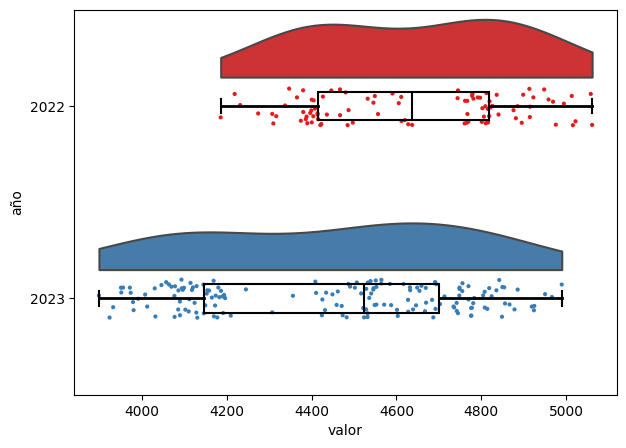

In [62]:
f, ax=plt.subplots(figsize=(7,5))
dy="año"; dx="valor"; ort="h";pal="Set1"

ax=pt.half_violinplot(x=dx,y=dy,data=trm_petro,palette=pal,bw=.6,cut=0.,scale="area",width= .6,inner=None,orient=ort)

ax=sns.stripplot( x = dx, y = dy, data =trm_petro, palette = pal,
 edgecolor = "white", size = 3, jitter = 1, zorder = 0,
 orient = ort)
ax=sns.boxplot( x = dx, y = dy, data = trm_petro, color = "black", 
 width = .15, zorder = 10, showcaps = True,
 boxprops = {'facecolor':'none', "zorder":10}, showfliers=True,
 whiskerprops = {'linewidth':2, "zorder":10},
 saturation = 1, orient = ort)

In [65]:
trm_petro['valor'].describe()

count     257.000000
mean     4518.226615
std       296.477943
min      3898.480000
25%      4273.820000
50%      4545.390000
75%      4776.090000
max      5061.210000
Name: valor, dtype: float64

In [76]:
def uprice(uc,lc):
    up=(uc+lc)*(1+(2*trm_petro['valor'].std()/trm_petro['valor'].mean()))
    return up

In [81]:
uprice(22000,23000)

50905.63890436517